# Day 5: Hydrothermal Venture
from [AdventOfCode website](https://adventofcode.com/2021])

You come across a field of hydrothermal vents on the ocean floor! These vents constantly produce large, opaque clouds, so it would be best to avoid them if possible.

They tend to form in lines; the submarine helpfully produces a list of nearby lines of vents (your puzzle input) for you to review. For example:

```
0,9 -> 5,9
8,0 -> 0,8
9,4 -> 3,4
2,2 -> 2,1
7,0 -> 7,4
6,4 -> 2,0
0,9 -> 2,9
3,4 -> 1,4
0,0 -> 8,8
5,5 -> 8,2
```

Each line of vents is given as a line segment in the format x1,y1 -> x2,y2 where x1,y1 are the coordinates of one end the line segment and x2,y2 are the coordinates of the other end. These line segments include the points at both ends. In other words:

- An entry like 1,1 -> 1,3 covers points 1,1, 1,2, and 1,3.
- An entry like 9,7 -> 7,7 covers points 9,7, 8,7, and 7,7.

**For now, only consider horizontal and vertical lines: lines where either x1 = x2 or y1 = y2.**

So, the horizontal and vertical lines from the above list would produce the following diagram:

```
.......1..
..1....1..
..1....1..
.......1..
.112111211
..........
..........
..........
..........
222111....
```` 

In this diagram, the top left corner is 0,0 and the bottom right corner is 9,9. Each position is shown as the number of lines which cover that point or . if no line covers that point. The top-left pair of 1s, for example, comes from 2,2 -> 2,1; the very bottom row is formed by the overlapping lines 0,9 -> 5,9 and 0,9 -> 2,9.

To avoid the most dangerous areas, you need to determine the number of points where at least two lines overlap. In the above example, this is anywhere in the diagram with a 2 or larger - a total of 5 points.

Consider only horizontal and vertical lines. At how many points do at least two lines overlap?

In [461]:
import re

def parse_raw_data(raw_data):
    for match in re.findall(r"(\d+),(\d+) -> (\d+),(\d+)", raw_data):
        a, b, c ,d = map(int, match)
        yield (a, b), (c, d)

lines = []

with open("input_day5.txt") as fp:
    lines = fp.read()

tuples = tuple(parse_raw_data(lines))

# Find the biggest value in the data
width = max(max([tu for tu in tuples]))
width = 1000
print(width)

# Keep only vertical and horizontal values
hv = []
for ((a, b), (c,d)) in tuples:
    if a == c or b == d:
        hv.append(((a, b), (c, d)))

1000


## Playing with `matplotlib`
The idea is here to test some of the basic functionalities of the library for displaying stuff.

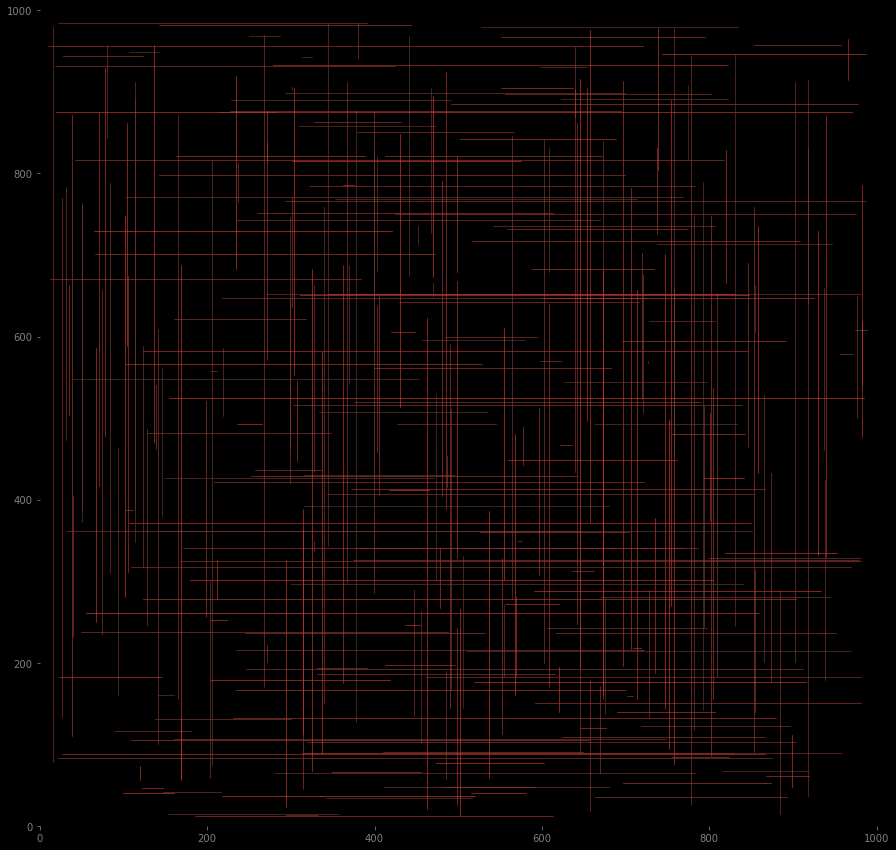

In [462]:
import matplotlib.pyplot as plt
import random

# Having fun with pictures
fig = plt.figure(figsize=(15, 15))

# Remove the bounding boxes of the graph
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

# Change the color of the ticks
plt.tick_params(axis='both', colors='gray')
plt.xlim(0, width), plt.ylim(0, width)
plt.style.use('dark_background')

toplot = []
for ((a,b), (c,d)) in hv:
    plotLine = ((a,c), (b,d))
    toplot.append(((a,c), (b,d)))

for line in toplot:
    # Draw each line with a slighly different color
    plt.plot(line[0], line[1], linewidth=0.60, 
            color=(0.2+ random.uniform(0.2, 0.7), 0.2 + random.uniform(0.01, 0.05), 0.2))

plt.show()

The answer for the first part is 5576


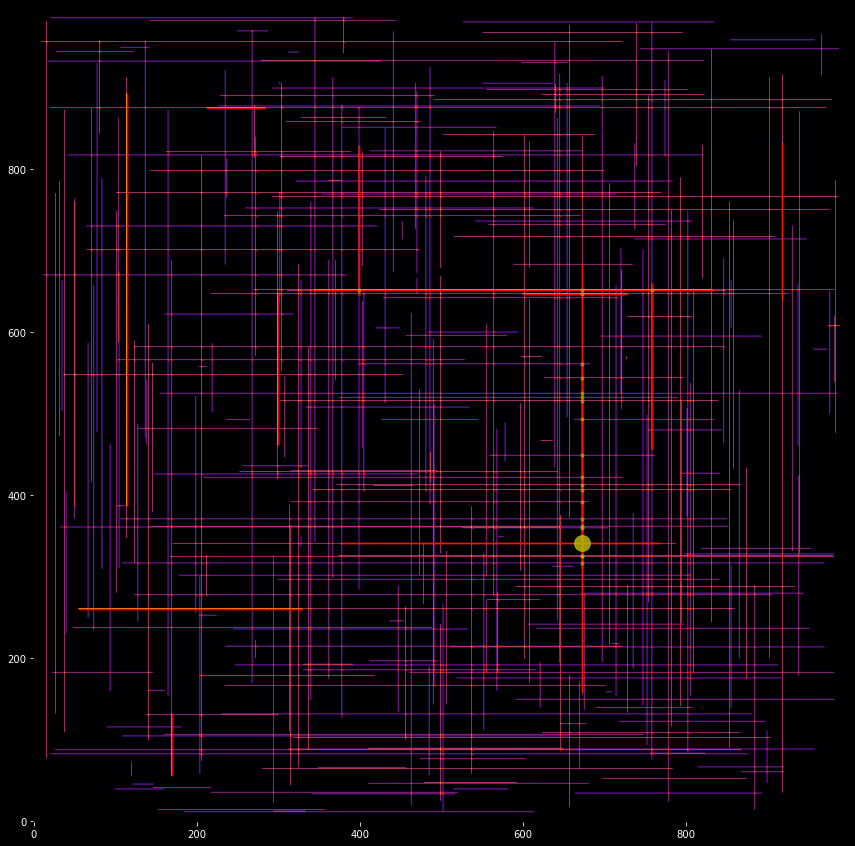

In [469]:
import numpy as np

foo = np.zeros((width, width))

# Compute the intersections
for couple in hv:    
    ((x1, y1), (x2, y2)) = couple
    # print(f'Data we got {x1}, {y1}, {x2}, {y2}')
    if x1 == x2:
        ymin = min(y1,y2)
        ymax = max(y1,y2)+1
        foo[x1, ymin:ymax] += 1
    elif y1 == y2:       
        xmin = min(x1,x2)
        xmax = max(x1,x2)+1
        foo[xmin:xmax, y1] += 1        
    else:
        print(f'Should not happen {x1}, {y1}, {x2}, {y2}')
    # print(foo.T)

plt.figure(figsize = (15,15))
plt.imshow(foo.T, vmin=0, vmax=2, origin='lower', cmap='inferno', interpolation='antialiased')

max_pos = np.where(foo == 2)
plt.scatter(max_pos[0], max_pos[1], c='r', s=1, alpha=0.5)

max_pos = np.where(foo == 3)
plt.scatter(max_pos[0], max_pos[1], c='red', s=3, alpha=0.5)

max_pos = np.where(foo == 4)
plt.scatter(max_pos[0], max_pos[1], c='y', s=10, alpha=0.5)

max_pos = np.where(foo == 5)
plt.scatter(max_pos[0], max_pos[1], c='y', s=250, alpha=0.8)

# Answering the question by finding all elements of the matrix where the value is > 1
answ = np.where(foo > 1)
print(f'The answer for the first part is {answ[0].size}')
# plt.colorbar()

## Playing with numpy arrays operations for part 2
The idea is to fill diagonals by using an identity matrix of the correct size and then add it to the matrix of intersections. Care has to be taken as some input have to be flipped horizontally (see conditions below in code)

```
a = np.zeros((10,10))
b = np.asarray([4,6,5,2])
b = np.diag(b)
a[1:5, 4:8] += np.fliplr(b)
a[1:5, 4:8] += np.fliplr(b)
a
```

And the correct answer is 18144


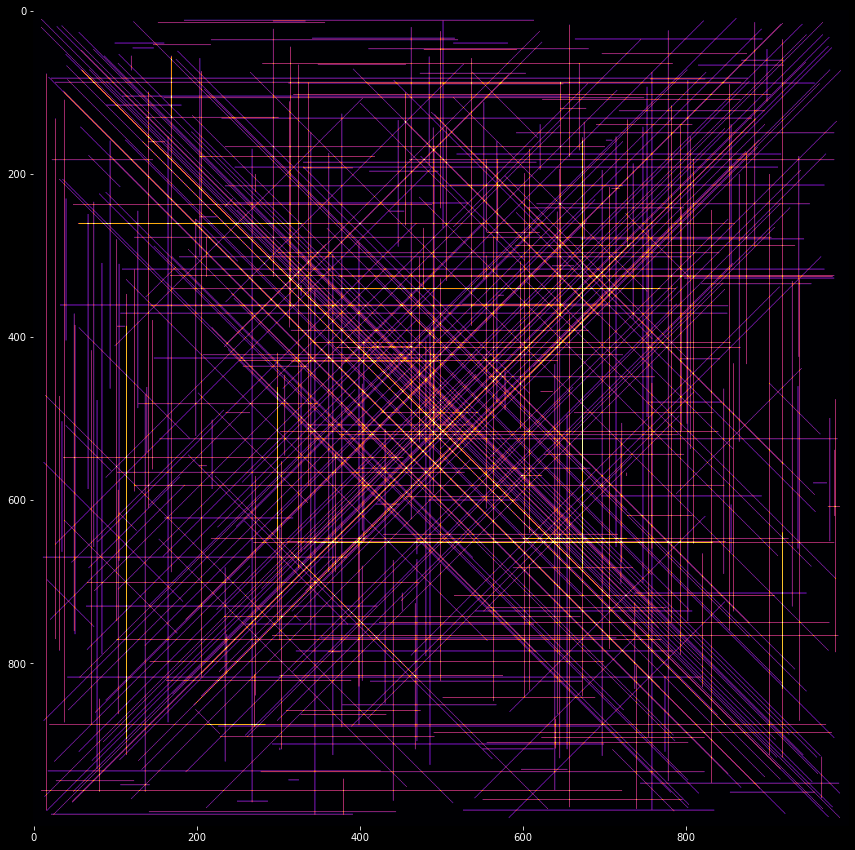

In [464]:
foo = np.zeros((width, width))

# Compute the intersections
for couple in tuples:    
    ((x1, y1), (x2, y2)) = couple
    ymin = min(y1,y2)
    ymax = max(y1,y2)+1
    xmin = min(x1,x2)
    xmax = max(x1,x2)+1
    
    if x1 == x2:        
        foo[x1, ymin:ymax] += 1
    elif y1 == y2:           
        foo[xmin:xmax, y1] += 1        
    else:        
        # Size of the identity matrix is dependent on the points locations
        # Here we don't take into account possible symetries as the length
        # will always be the same
        distance = abs(x1 - x2)+1
        z = np.identity(distance)
        
        # Add to the diagonals, at the correct location,
        # a correctly dimensioned identity matrix
        # This probably could be optimised
        if x1 < x2 and y1 < y2 :
            foo[x1:x2+1, y1:y2+1] += z
        elif x1 > x2 and y1 > y2 :
            foo[x2:x1+1, y2:y1+1] += z
        elif x1 < x2 and y1 > y2:
            foo[x1:x2+1, y2:y1+1] += np.fliplr(z)
        elif x1 > x2 and y1 < y2:
            foo[x2:x1+1, y1:y2+1] += np.fliplr(z)              

# Displaying the final result
plt.figure(figsize = (15,15))
plt.imshow(foo.T, vmin=0, vmax=2, origin='upper', cmap='inferno', interpolation='antialiased')

# Answering the question
answ = np.where(foo > 1)

print(f'And the correct answer is {answ[0].size}')